Solution to the Diffusion (Heat) Equation

In [ ]:
"""
MATH572 Parabolic Problems

@author: Alessandro
"""
import sys, time
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg
import scipy.linalg

"""
===== ==========================================================
Name  Description
===== ==========================================================
Nx    The total number of mesh cells; mesh points are numbered
      from 0 to Nx.
T     The stop time for the simulation.
I     Initial condition (Python function of x).
a     Variable coefficient (constant).
L     Length of the domain ([0,L]).
x     Mesh points in space.
t     Mesh points in time.
n     Index counter in time.
u     Unknown at current/new time level.
u_n   u at the previous time level.
dx    Constant mesh spacing in x.
dt    Constant mesh spacing in t.
===== ==========================================================
"""


'\n===== ==========================================================\nName  Description\n===== ==========================================================\nNx    The total number of mesh cells; mesh points are numbered\n      from 0 to Nx.\nT     The stop time for the simulation.\nI     Initial condition (Python function of x).\na     Variable coefficient (constant).\nL     Length of the domain ([0,L]).\nx     Mesh points in space.\nt     Mesh points in time.\nn     Index counter in time.\nu     Unknown at current/new time level.\nu_n   u at the previous time level.\ndx    Constant mesh spacing in x.\ndt    Constant mesh spacing in t.\n===== ==========================================================\n'

In [ ]:
def visualize(x, t, u):
    plt.plot(x, u, 'r')
#    plt.plot(x,u_ex(x, t),'b')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title('Solution at time t=%g' % t)
#    umin = 1.2*u.min()
#    umax = -umin
    plt.axis([x[0], x[-1], -0.5, 1.2])
    plt.show()


def error_loc(u,u_ex):
    diff = np.abs(u - u_ex)
    diffnobc = diff[1:-2]
    ei = np.max(diff)
    print(ei)
    el2 = np.sqrt(h*diffnobc.T.dot(diffnobc)  + h/2*(diff[0]**2+diff[-1]**2))
    print(el2)
    return ei, el2


In [ ]:
def IC(x):
# initial conditions
    return 0.5*np.where(x<=0.3,0.,1.)+0.5*np.where(x>=0.7,0.,1.)
#    return np.sin(np.pi*x)


def BC(a,b,t):
    uL = 0.
    uR = 0.
    return uL, uR

def f(x,t):
    return 0.0


def u_ex(x,t):
    return np.exp(-t)*np.sin(np.pi*x)


# DEFINITION OF THE PROBLEM
T = 5 # final time
xl = 0 # leftmost point
xr = 1 # righmost point

mu = 1./(np.pi**2) # diffusivity
beta = 0 # convection
sigma = 0 # reaction


# discretization parameters
dt = 0.1
h = 0.01
th =  0.5  # theta
#r = dt/h**2

In [ ]:

Nx = int(round(np.abs(xr-xl)/h))
Nt = int(round(T/dt))

# Space mesh & time mesh
x = np.linspace(xl,xr,Nx+1)
t = np.linspace(0,T,Nt+1)

# Error computing data structures
eil = np.zeros(Nt)
el2l = np.zeros(Nt)


# MATRIX ASSEMBLY (for time independent coefficients)
u   = np.zeros(Nx+1)
u_n = np.zeros(Nx+1)


# Data structures for the linear system
A = np.zeros((Nx+1, Nx+1))
b = np.zeros(Nx+1)

Ad =-(mu/h**2)*sp.diags([1., -2., 1.], [-1, 0, 1], shape=[Nx+1, Nx+1], format = 'csr')
Ac =beta/(2*h)*sp.diags([-1., 0., 1.], [-1, 0, 1], shape=[Nx+1, Nx+1], format = 'csr')
Ar = sigma*sp.identity(Nx+1, format = 'csr')
A = Ad # + Ac + Ar

LeftM = sp.identity(Nx+1, format = 'csr') + dt*th*A
RightM = sp.identity(Nx+1, format = 'csr') - dt*(1-th)*A

# boundary conditions
aux_bc = 1.
LeftM[0, 1] = 0.
LeftM[-1, -2] = 0.
LeftM[0, 0] = aux_bc
LeftM[-1, -1] = aux_bc

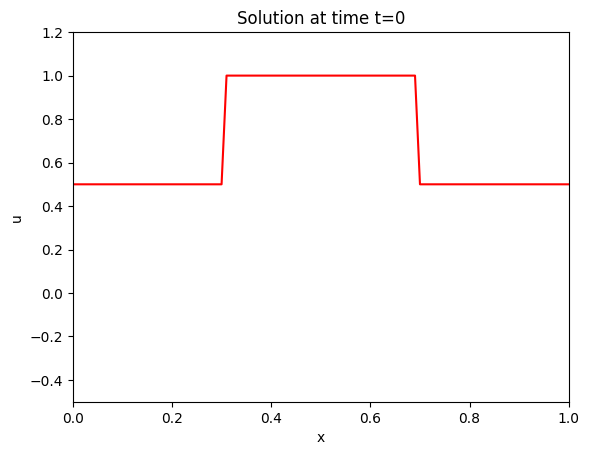

Computing at time 0.1


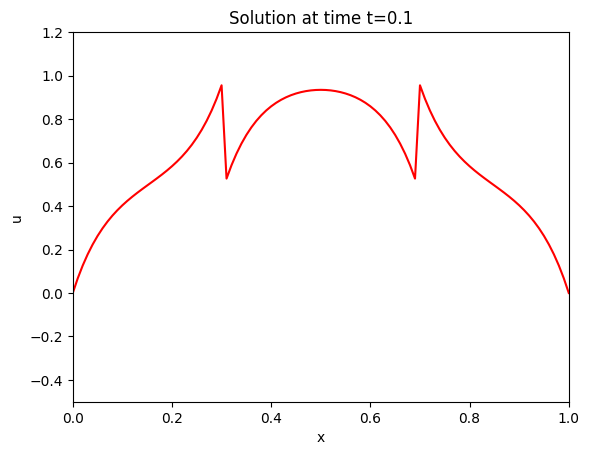

0.22344314902607465
0.09626197885816425
Computing at time 0.2


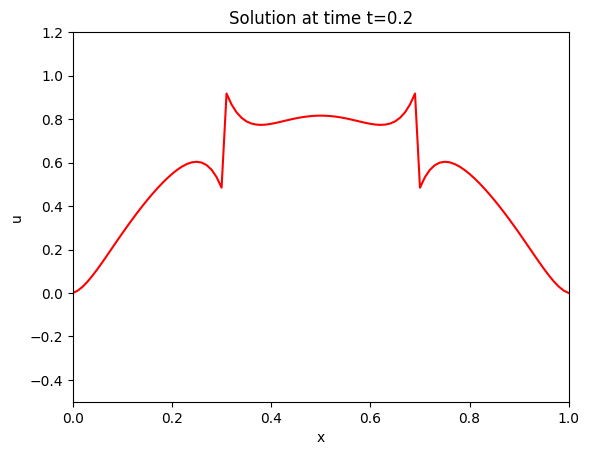

0.24034134109974337
0.0654993098994879
Computing at time 0.30000000000000004


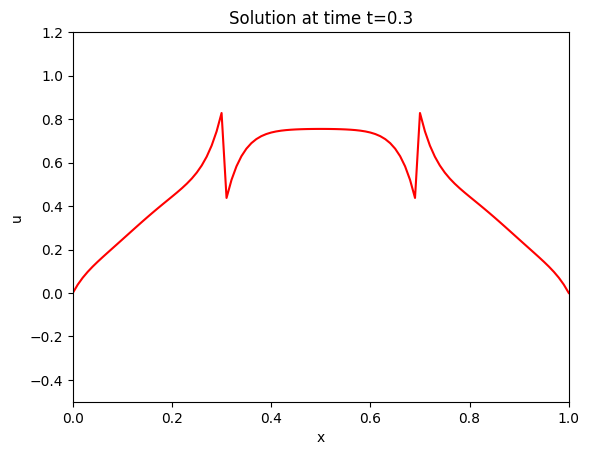

0.22857387740335855
0.05637069846834929
Computing at time 0.4


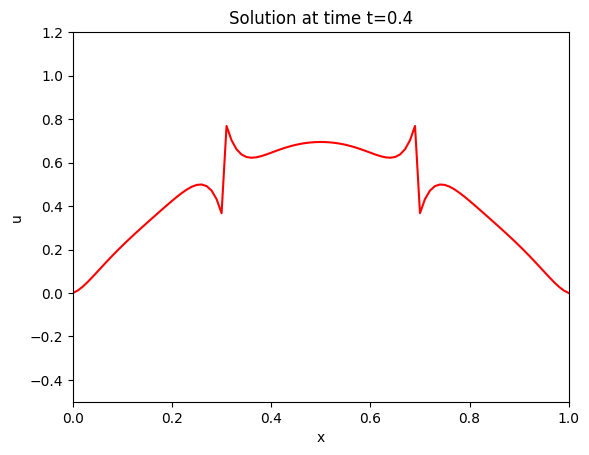

0.214067148963637
0.05131324735465584
Computing at time 0.5


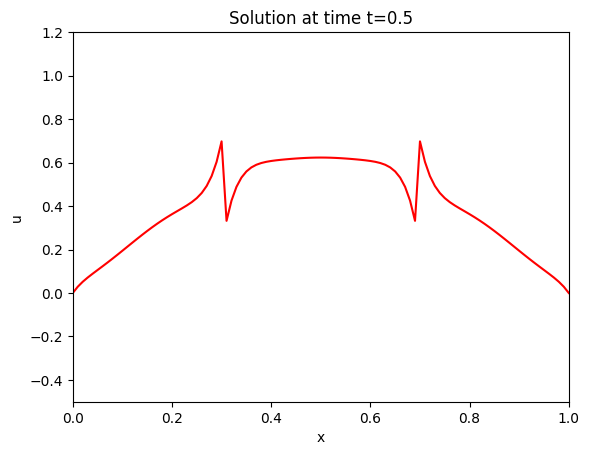

0.20673404391068434
0.04771901682619425
Computing at time 0.6


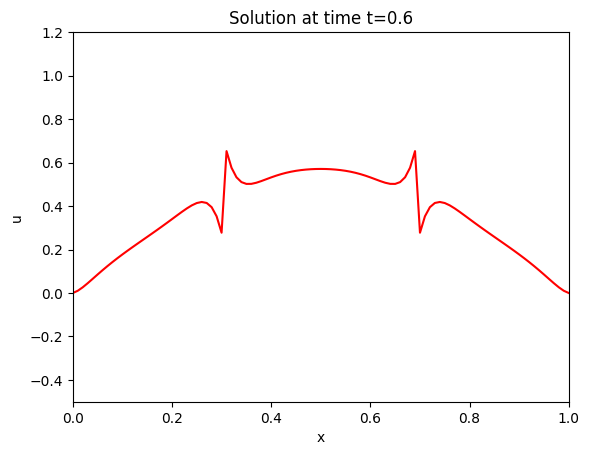

0.19887489138444375
0.044893092320734754
Computing at time 0.7


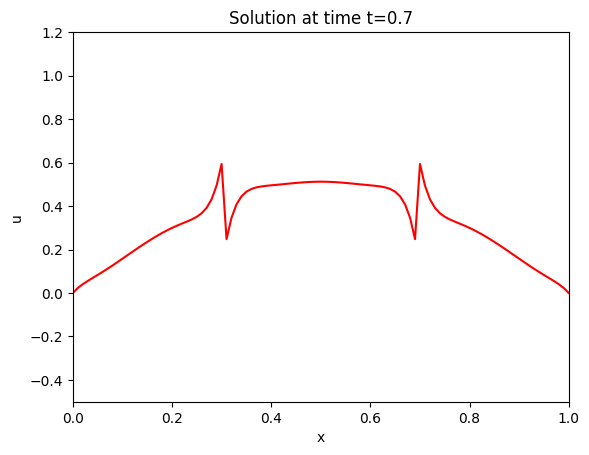

0.19177578705939108
0.0425457764094798
Computing at time 0.7999999999999999


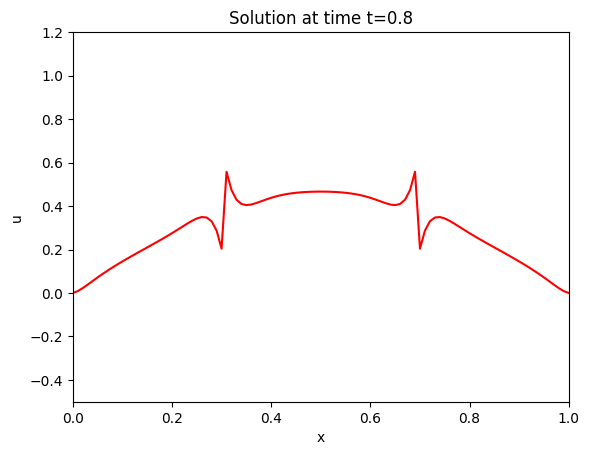

0.18606543812411108
0.04054451087353185
Computing at time 0.8999999999999999


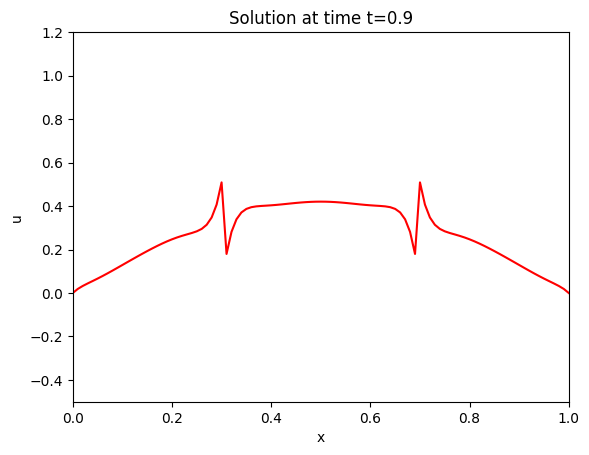

0.1798801966618645
0.03879877585303633
Computing at time 0.9999999999999999


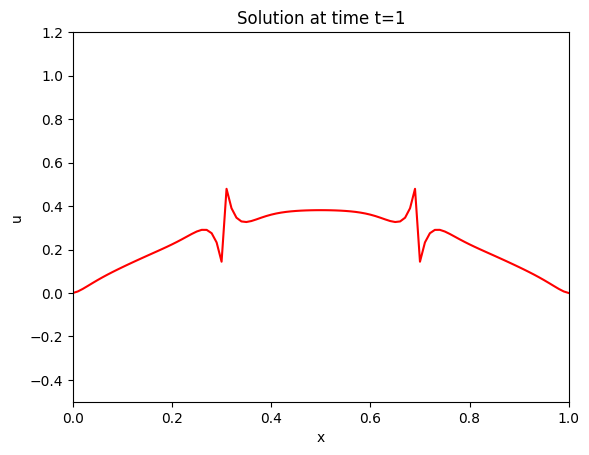

0.17501784980013707
0.03725901979004941
Computing at time 1.0999999999999999


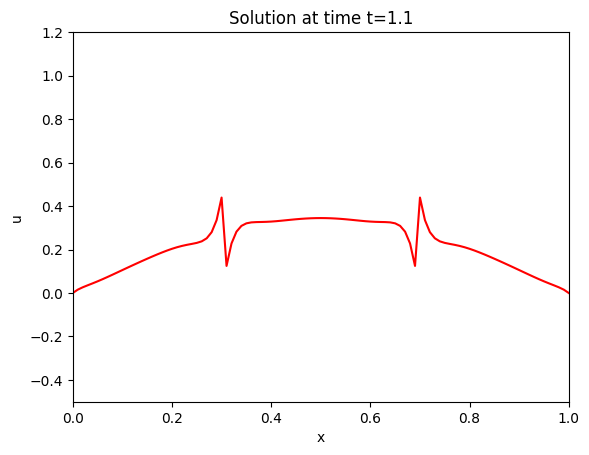

0.16973703870264067
0.03588163842566273
Computing at time 1.2


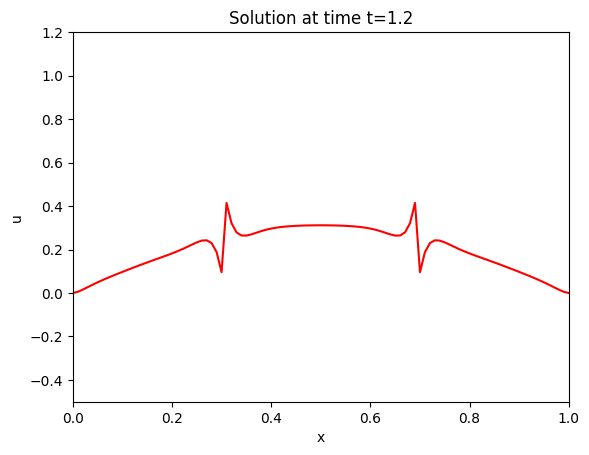

0.16539217198303213
0.03464195128688721
Computing at time 1.3


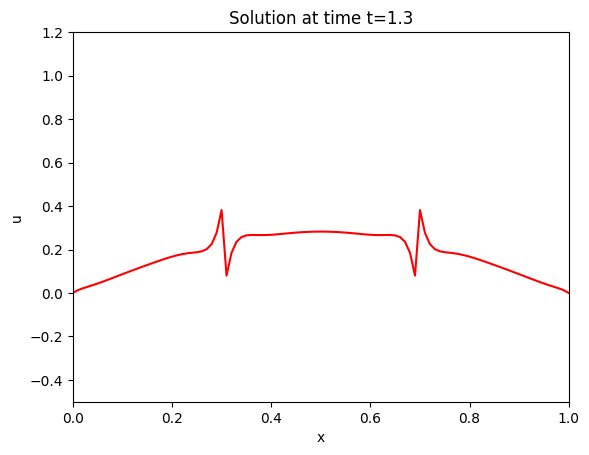

0.16082986610872477
0.03351439631186974
Computing at time 1.4000000000000001


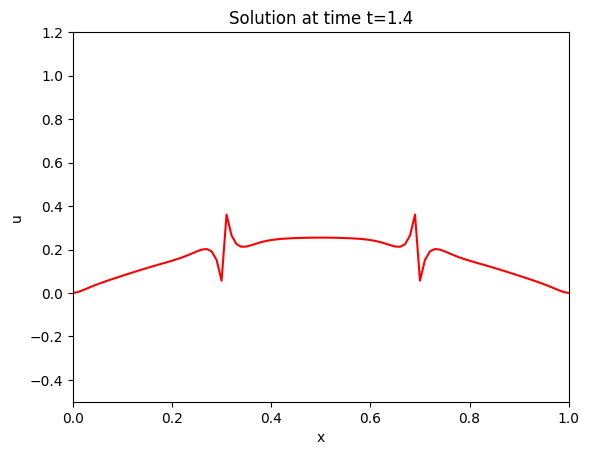

0.15690508364310346
0.03248469278687882
Computing at time 1.5000000000000002


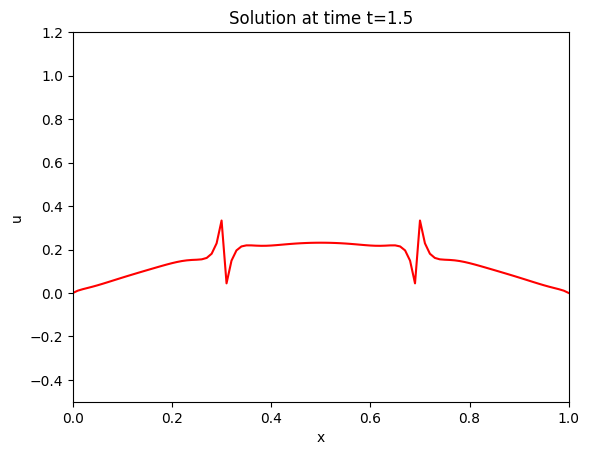

0.15288991937371357
0.03153627497859045
Computing at time 1.6000000000000003


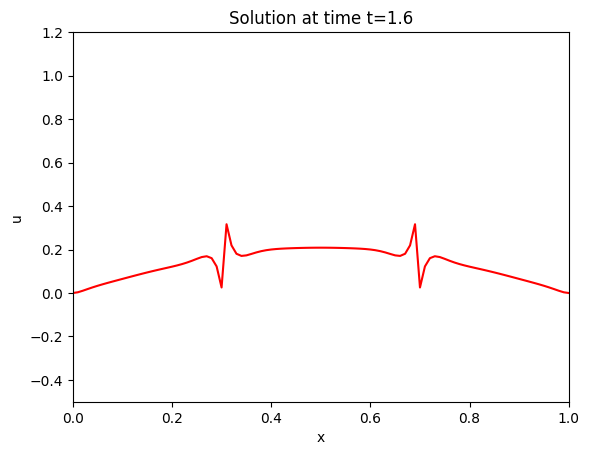

0.1493335341688725
0.03066014055640901
Computing at time 1.7000000000000004


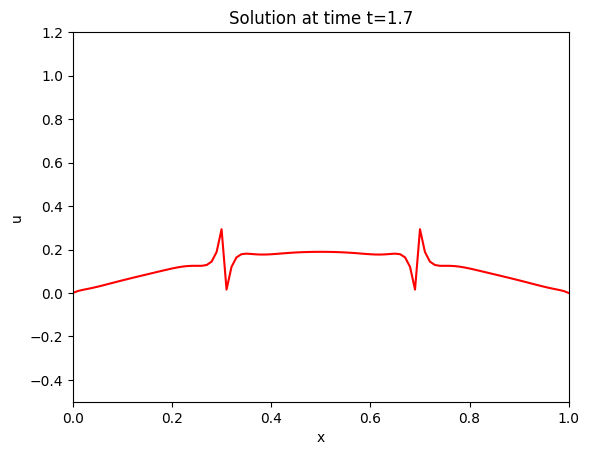

0.14574235172861633
0.029844937501442133
Computing at time 1.8000000000000005


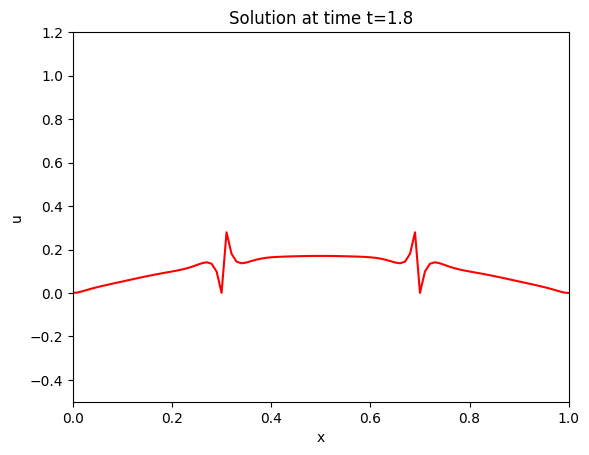

0.14250865988678835
0.029084677885378715
Computing at time 1.9000000000000006


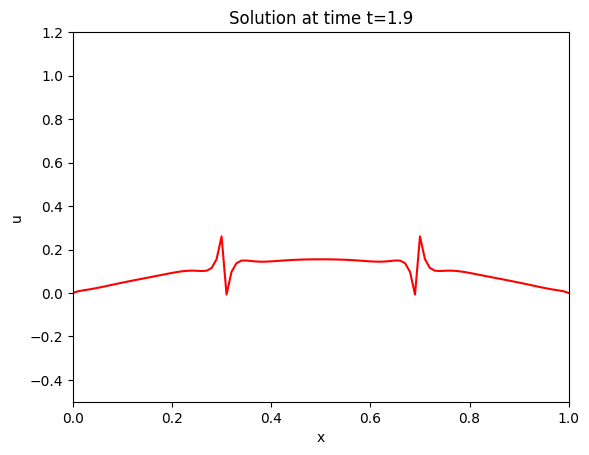

0.13925768409712397
0.028371309292561386
Computing at time 2.0000000000000004


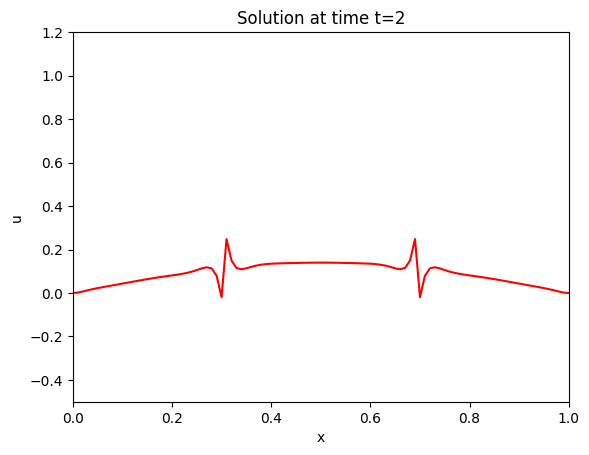

0.1363030466581027
0.02770069837033403
Computing at time 2.1000000000000005


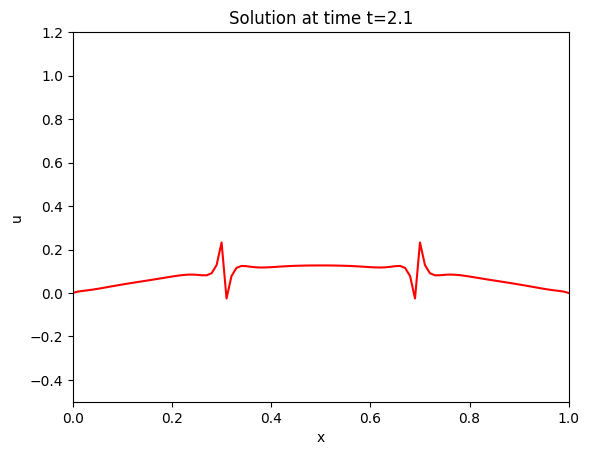

0.13333418292113636
0.02706699583481816
Computing at time 2.2000000000000006


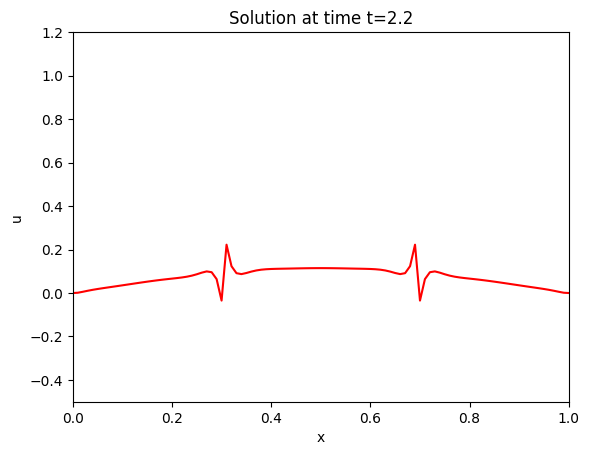

0.13061910073242253
0.026467266558726173
Computing at time 2.3000000000000007


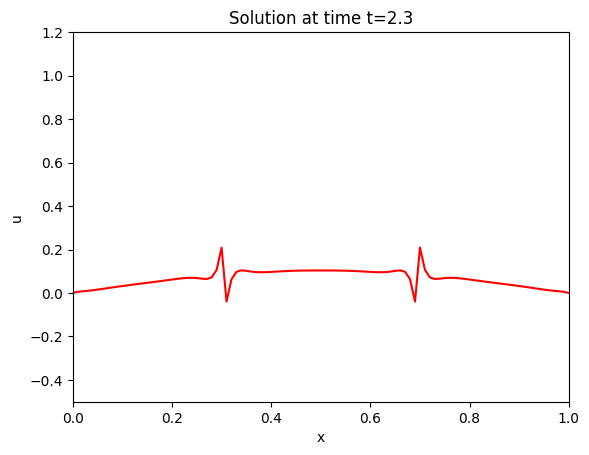

0.12788995071540926
0.025897183451251353
Computing at time 2.400000000000001


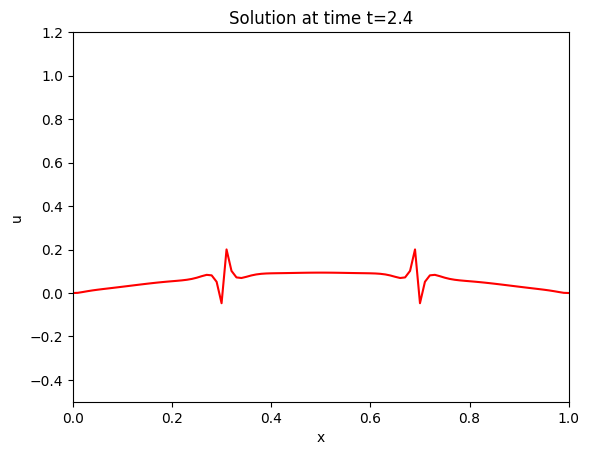

0.12538049002097912
0.025354611813616274
Computing at time 2.500000000000001


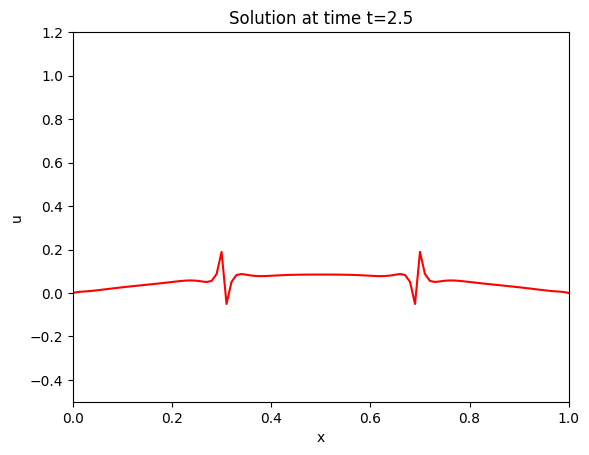

0.122858347436252
0.024836301011558547
Computing at time 2.600000000000001


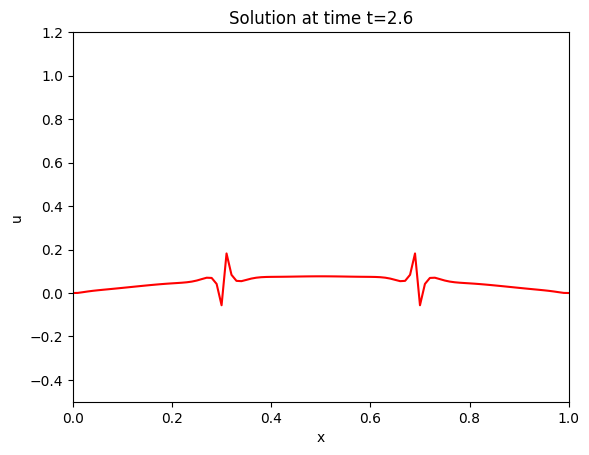

0.1205262889169788
0.024340664072273924
Computing at time 2.700000000000001


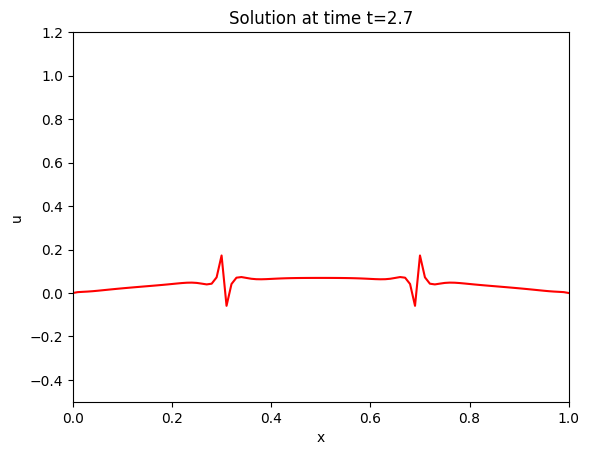

0.11818478873220155
0.023865224813341558
Computing at time 2.800000000000001


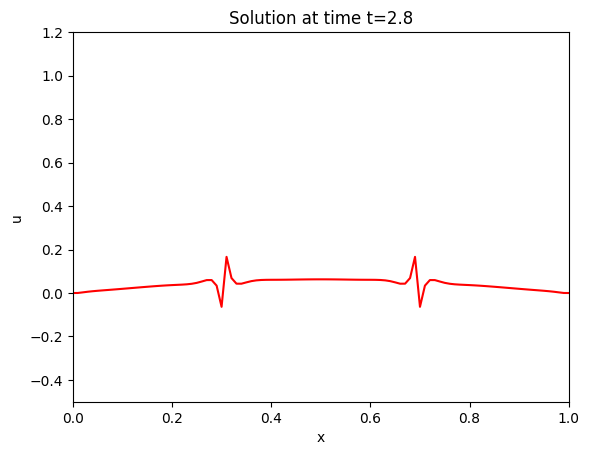

0.11600702773478386
0.02340877823580114
Computing at time 2.9000000000000012


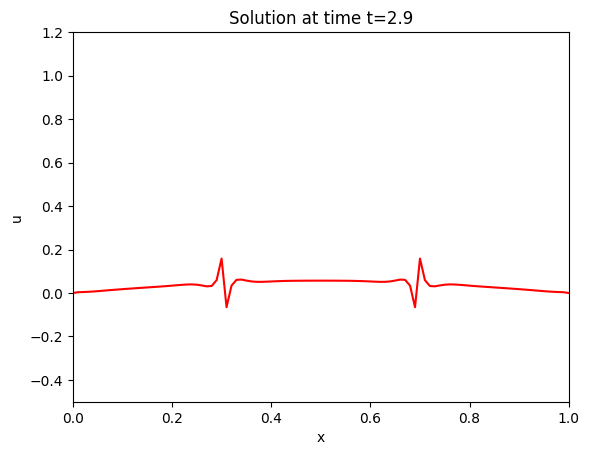

0.11382429955126458
0.022969413172162206
Computing at time 3.0000000000000013


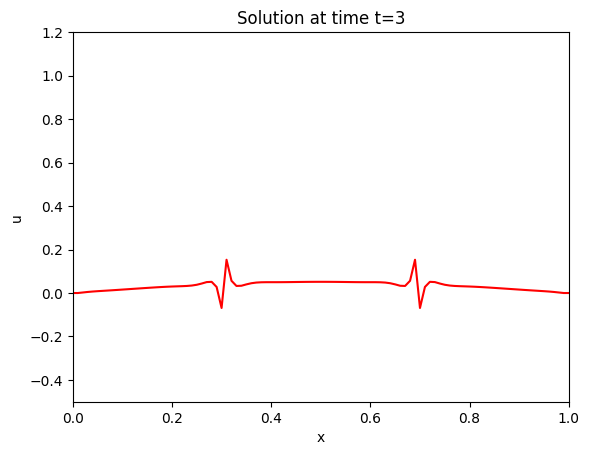

0.11178198492156938
0.022546195440556586
Computing at time 3.1000000000000014


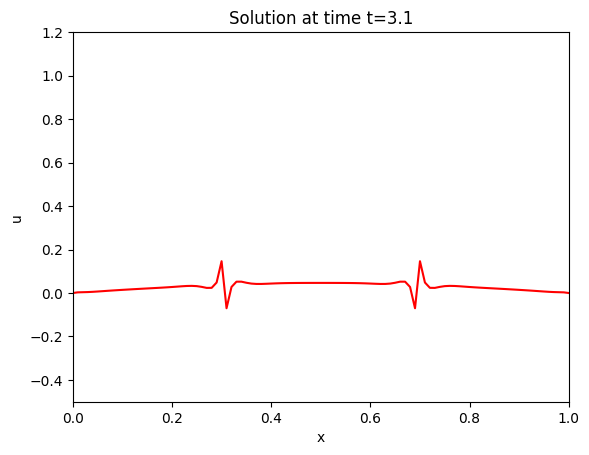

0.10973959172745121
0.022137631190667507
Computing at time 3.2000000000000015


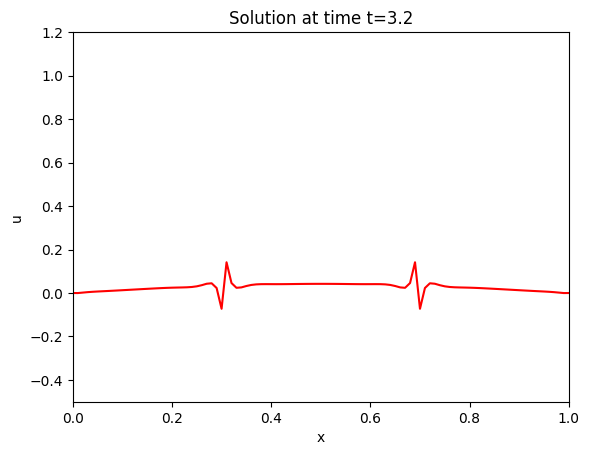

0.10781727529549415
0.021742981294125843
Computing at time 3.3000000000000016


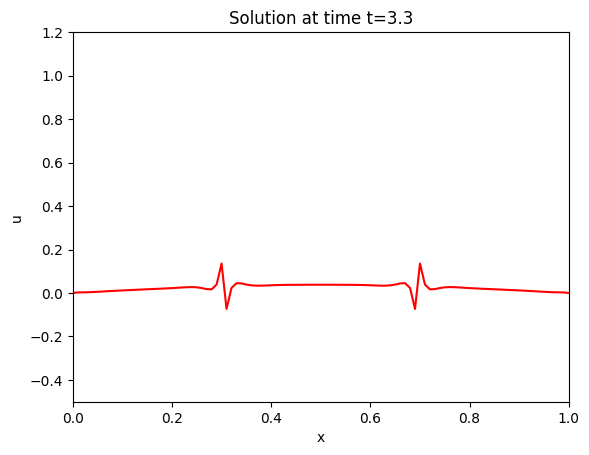

0.10589954595793184
0.02136106367623425
Computing at time 3.4000000000000017


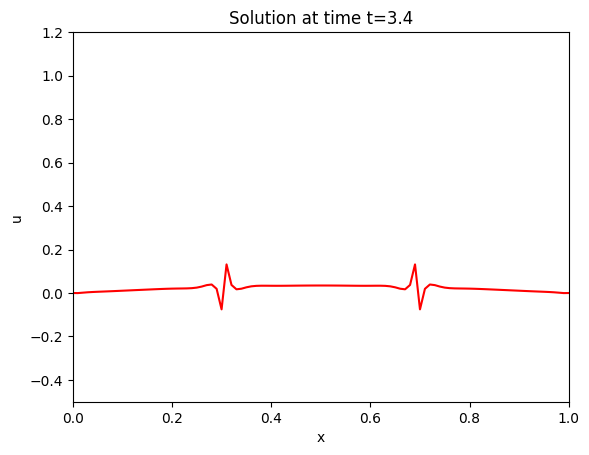

0.10408445458665651
0.02099128194594906
Computing at time 3.5000000000000018


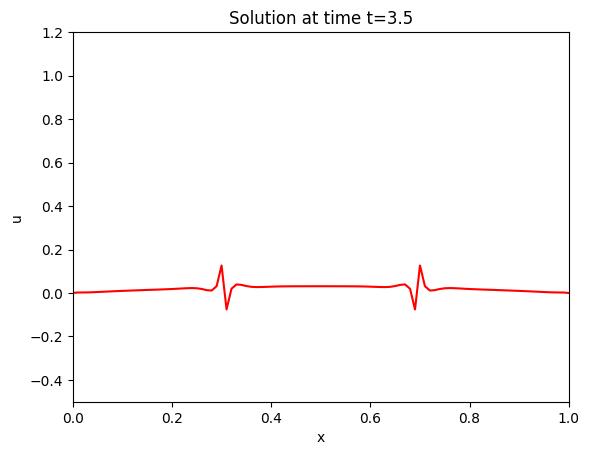

0.10227801404467135
0.020632689528061327
Computing at time 3.600000000000002


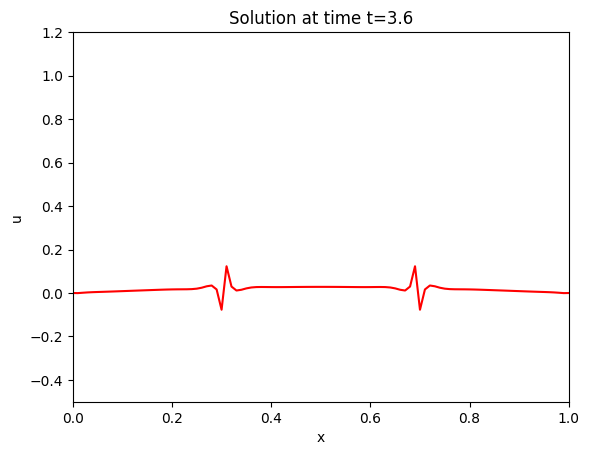

0.1005594690788383
0.020284796222498933
Computing at time 3.700000000000002


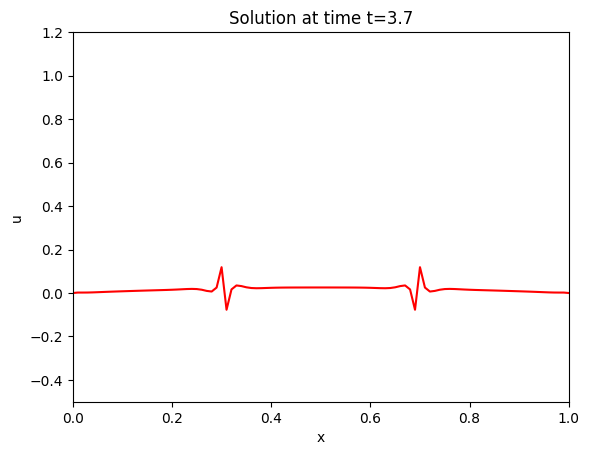

0.09885287410938015
0.01994683525299845
Computing at time 3.800000000000002


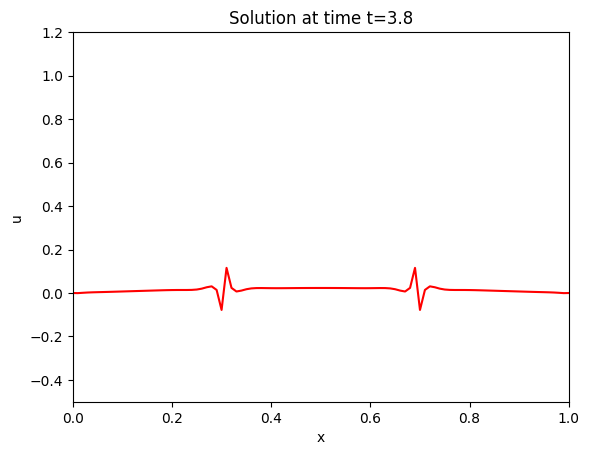

0.09722184483593205
0.019618396790040973
Computing at time 3.900000000000002


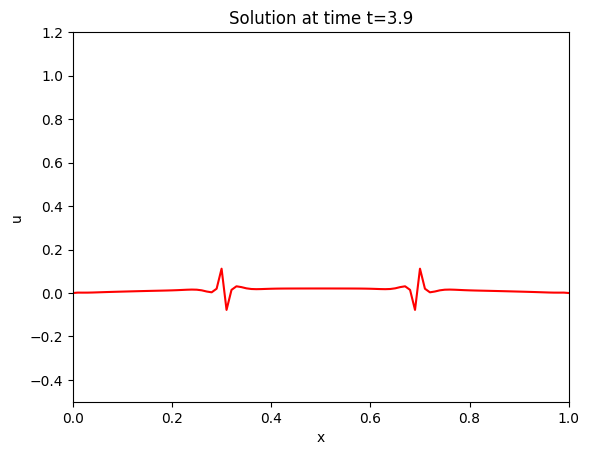

0.09560528408670241
0.01929885277625721
Computing at time 4.000000000000002


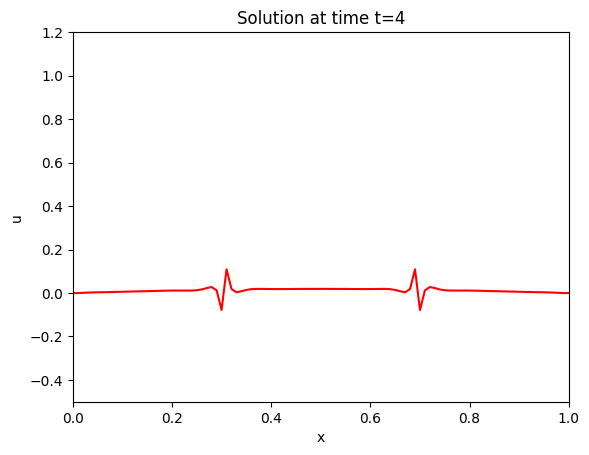

0.09405404973623817
0.01898785529493556
Computing at time 4.100000000000001


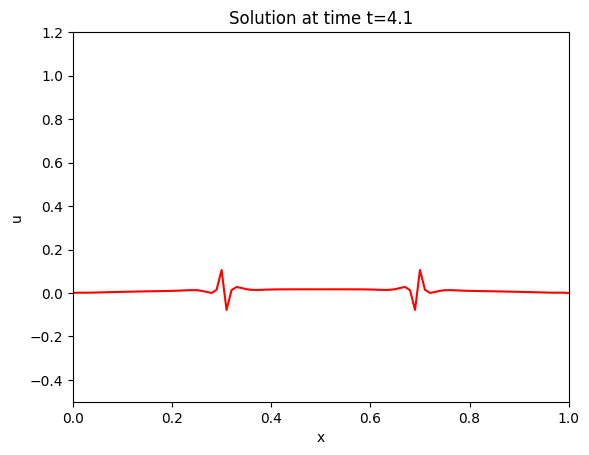

0.09251908977324573
0.018684884416671706
Computing at time 4.200000000000001


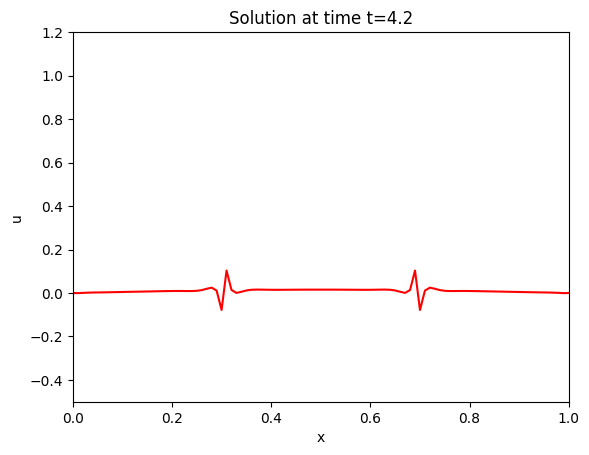

0.09104098439879026
0.018389640776165242
Computing at time 4.300000000000001


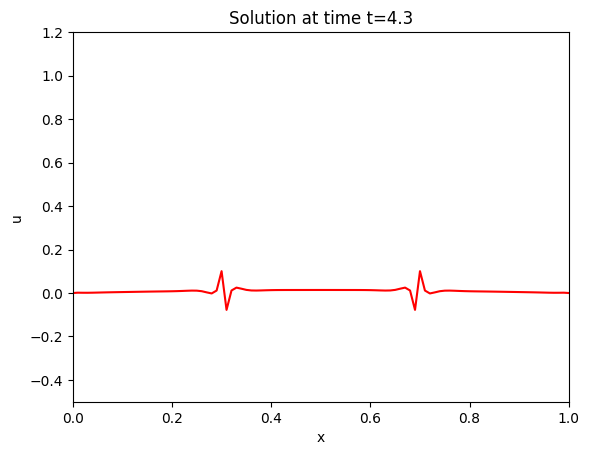

0.0895803531325327
0.018101689575078937
Computing at time 4.4


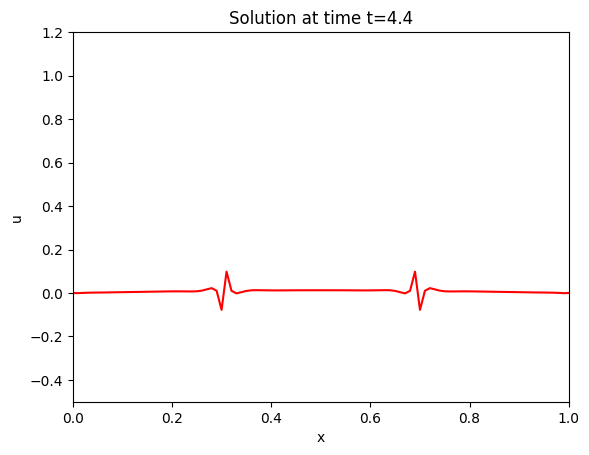

0.08816957184679229
0.017820770195032823
Computing at time 4.5


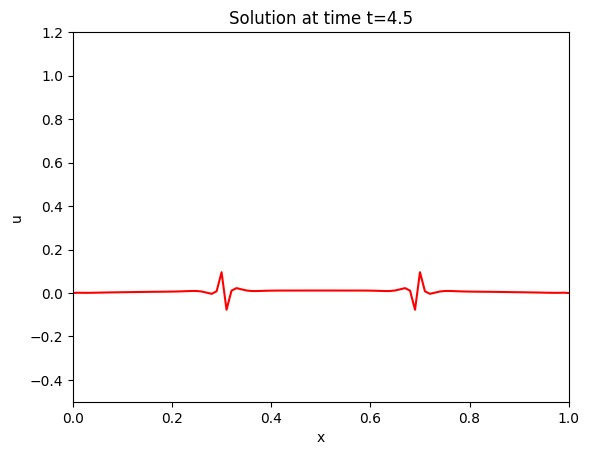

0.08677697430200271
0.0175465155188936
Computing at time 4.6


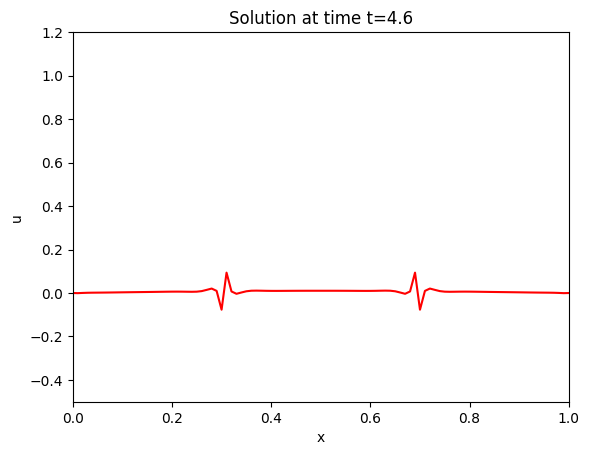

0.08542842432560274
0.017278696374858703
Computing at time 4.699999999999999


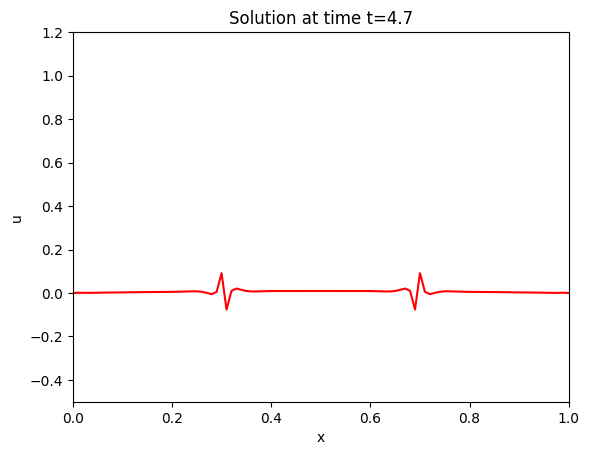

0.08409838688864024
0.017016999964540605
Computing at time 4.799999999999999


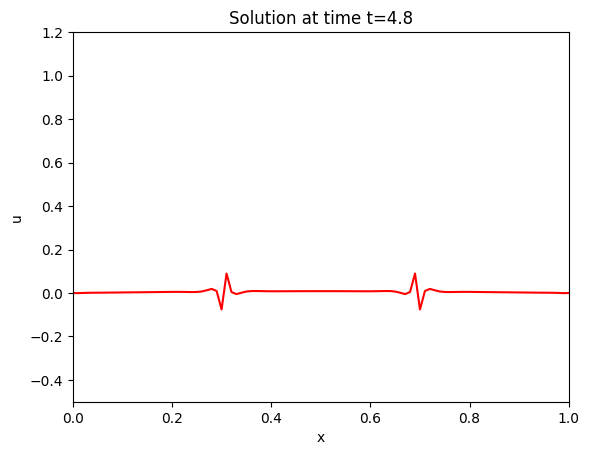

0.08280757127060293
0.01676122304209665
Computing at time 4.899999999999999


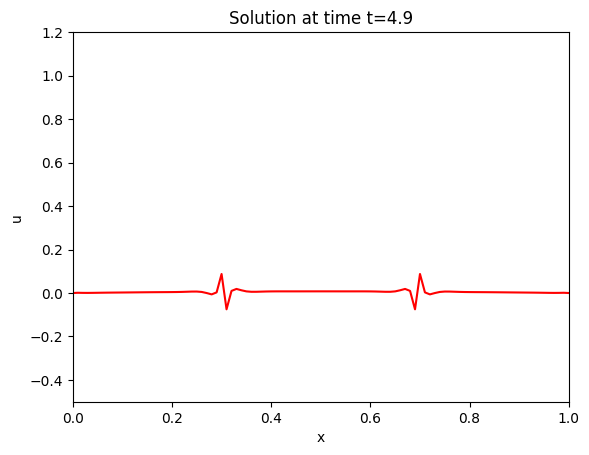

0.08153531088971211
0.016511096803412992
Computing at time 4.999999999999998


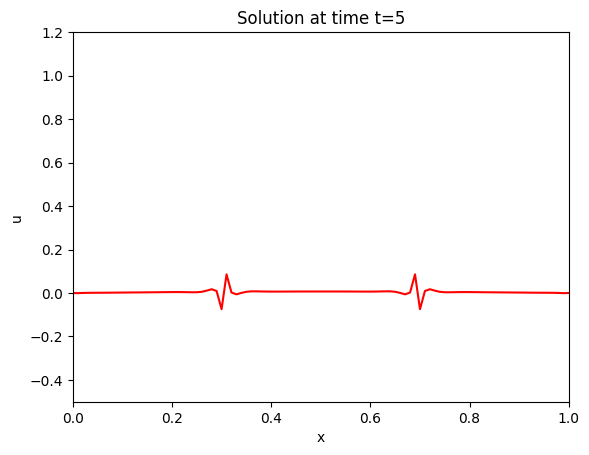

0.0802982362229543
0.01626643968612266
Error infinity 0.24034134109974337
Error L2(L2) 0.06946044237651074


In [ ]:
# REM: We could factorize the matrix LeftM here

# Initial conditions
tc = 0 # current time
u_n = IC(x)
visualize(x,tc,u_n)

# TIME LOOP
for n in range(0,Nt):
    tc += dt
    print("Computing at time", tc)
    # right hand side
    b = dt*(th*f(x,tc)+(1-th)*f(x,tc-dt)) + RightM*u_n
    uL, uR = BC(xl,xr,tc)
    b[0] = aux_bc*uL
    b[-1] = aux_bc*uR
    u = sp.linalg.spsolve(LeftM, b)
    visualize(x,tc,u)
    u_n = u
#    error computing
    eil[n], el2l[n] = error_loc(u,u_ex(x,tc))

#"""
ei_tot = eil.max()
eL2 = np.sqrt(dt*(el2l[1:-2].T.dot(el2l[1:-2])) + dt/2*(el2l[0]**2+el2l[-1]**2))
print("Error infinity", ei_tot)
print("Error L2(L2)", eL2)
#"""